# Logistic Regression

Font: https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python

Import libraries

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', 200)

Creating a df with the disease rates for each city and their respective RISK value (1, if it belongs to a high risk cluster, and 0 otherwise).

In [2]:
cities = pd.read_csv('../../SatScan/muncod_risk_2015_to_2017.csv', index_col=[0])

disease = ""
path = '../../TabNet/Rates/'
all_files = glob.glob(path + "*.csv")
diseases_list = []
all_diseases = cities
for file in all_files:
    file_name = file.split("\\")[1]
    disease = file_name.split("_RATE")[0]
    disease_df = pd.read_csv(path + disease + '_RATE_15_17.csv', sep=',', index_col=0)
    disease_df = disease_df[["RATE", "MUNCOD"]]
    disease_df.rename(columns={"RATE": disease}, inplace=True)

    all_diseases = pd.merge(disease_df, all_diseases, left_on="MUNCOD", right_on="MUNCOD", how="outer")
df = all_diseases.drop('MUNCOD', 1)
df = df.drop('TRAUMATISMO_INTRACRANIANO', 1) # We remove Traumatismo Intracraniano (low p-value on Spearman test)
df = df.fillna(0)

In [3]:
df.shape

(5658, 15)

Fitting a logistic regression line to visualize how the probability of being in a risk cluster changes with the cancer rate label.

The “cancer” was plotted on x-axis and “risk cluster” on the y-axis using regplot( ).

This plot gives us an intuition of how the logistic model fits an ‘S’ curve line and how the probability changes from 0 to 1 with observed values.

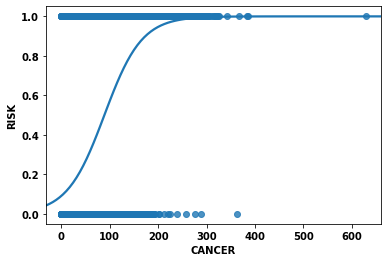

In [4]:
sns.regplot(x="CANCER", y="RISK", data=df, logistic=True, ci=True)
plt.show()

Selecting X (independent variables) and y (dependent binary variable).

In [5]:
X = df.iloc[:, 0:14].values
y = df.iloc[:, -1].values

Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Fitting Logistic Regression to the Training set

In [8]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

C:\Users\marco\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Predicting the Test set results

In [9]:
y_pred = classifier.predict(X_test)

Making the Confusion Matrix

In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1272,  245],
       [ 440,  872]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

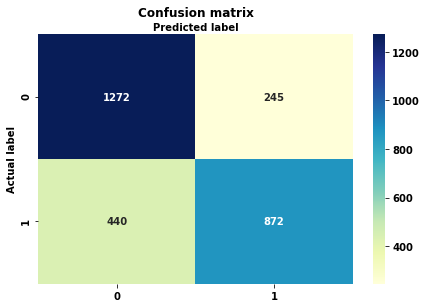

In [11]:
class_names = [0, 1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Checking Evaluation metrics

In [12]:
from sklearn import metrics
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.7806624888093107
Recall: 0.6646341463414634


0.5

- Precision: When the model makes a prediction, how often it is correct.
In our case, when the Logistic Regression model predicted cities belong to a high risk cluster, the prediction was correct 78% of the time.
- Recall: If there are cities in a high risk cluster in the test set, the model can identify them 66% of the time.

Plotting the ROC curve

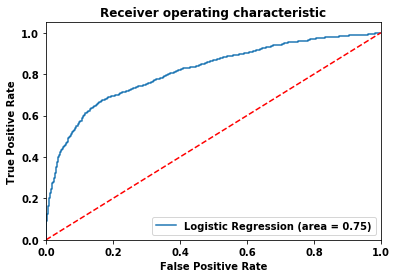

In [13]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

plt.rc("font", size=10)
logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Selecting most significant features

In [14]:
from sklearn.feature_selection import RFE
selector = RFE(classifier, n_features_to_select=1, step=1)
selector = selector.fit(X_train, y_train)
rank = selector.ranking_

C:\Users\marco\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\marco\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\marco\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\marco\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\marco\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Features: rank of significance

In [15]:
significant_features = list()
for i in range(len(df.columns) - 1):
    significant_features.append((rank[i], df.columns[i]))
significant_features.sort(key=lambda x:x[0])
significant_features

[(1, 'CANCER'),
 (2, 'DPOC'),
 (3, 'ASMA'),
 (4, 'DORSOPATIAS'),
 (5, 'EPILEPSIA'),
 (6, 'INSUFICIENCIA_RENAL'),
 (7, 'DIABETES_MELLITUS'),
 (8, 'OSTEOPOROSE'),
 (9, 'HIPERTENSAO_ESSENCIAL'),
 (10, 'ENXAQUECA'),
 (11, 'ESCLEROSE_MULTIPLA'),
 (12, 'DOENCA_DE_PARKINSON'),
 (13, 'INSUFICIENCIA_CARDIACA'),
 (14, 'AIDS')]

* 0.25

[(1, 'CANCER'),
 (2, 'DPOC'),
 (3, 'EPILEPSIA'),
 (4, 'ENXAQUECA'),
 (5, 'INSUFICIENCIA_RENAL'),
 (6, 'INSUFICIENCIA_CARDIACA'),
 (7, 'DOENCA_DE_PARKINSON'),
 (8, 'DORSOPATIAS'),
 (9, 'ESCLEROSE_MULTIPLA'),
 (10, 'ASMA'),
 (11, 'HIPERTENSAO_ESSENCIAL'),
 (12, 'DIABETES_MELLITUS'),
 (13, 'AIDS'),
 (14, 'OSTEOPOROSE')]
 
 * 0.5
 
[(1, 'CANCER'),
 (2, 'DPOC'),
 (3, 'EPILEPSIA'),
 (4, 'ENXAQUECA'),
 (5, 'DOENCA_DE_PARKINSON'),
 (6, 'INSUFICIENCIA_RENAL'),
 (7, 'ESCLEROSE_MULTIPLA'),
 (8, 'HIPERTENSAO_ESSENCIAL'),
 (9, 'DIABETES_MELLITUS'),
 (10, 'INSUFICIENCIA_CARDIACA'),
 (11, 'DORSOPATIAS'),
 (12, 'AIDS'),
 (13, 'OSTEOPOROSE'),
 (14, 'ASMA')]

## K-fold cross Validation

Load libraries

In [16]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

Define X and y

In [17]:
X = df.iloc[:, 0:14].values
y = df.iloc[:, -1].values

Create a pipeline that standardizes, then runs logistic regression

In [18]:
standardizer = StandardScaler()
logit = LogisticRegression()
pipeline = make_pipeline(standardizer, logit)

Do k-fold cross-validation

In [19]:
kf = KFold(n_splits=10, shuffle=True, random_state=1)
cv_results = cross_val_score(pipeline, # Pipeline
                             X, # Feature matrix
                             y, # Target vector
                             cv=kf, # Cross-validation technique
                             scoring="recall", # Loss function
                             n_jobs=-1) # Use all CPU scores

(array([3., 0., 0., 0., 0., 2., 2., 0., 2., 1.]),
 array([0.62992126, 0.63715814, 0.64439502, 0.6516319 , 0.65886879,
        0.66610567, 0.67334255, 0.68057943, 0.68781631, 0.69505319,
        0.70229008]),
 <a list of 10 Patch objects>)

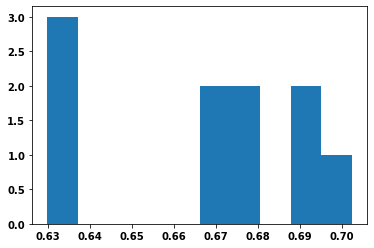

In [20]:
plt.hist(x=cv_results, bins=10)

Calculate Mean Performance Score

In [21]:
cv_results.mean()

0.6677769344139581

The value of the recall for y_test is 0.6646341463414634, which is really close to the average obtained by cross-validation.

## Testing with 2018 data

Creating a df with the disease rates for each city. Now, we'll predict if the cities belong or not to the high RISK cluster (1, if it belongs to a high risk cluster, and 0 otherwise).

In [71]:
cities = pd.read_csv('../../SatScan/muncod_risk_2015_to_2017.csv', index_col=[0]) # use muncod_risk_2018
cities['RISK'] = 0 # erase this, when using muncod_risk_2018

disease = ""
path = '../../TabNet/Rates/2018/'
all_files = glob.glob(path + "*.csv")
all_diseases = cities
diseases_list = []
for file in all_files:
    file_name = file.split("\\")[1]
    disease = file_name.split("_RATE")[0]
    disease_df = pd.read_csv(path + disease + '_RATE_18.csv', sep=',', index_col=0)
    disease_df = disease_df[["RATE", "MUNCOD"]]
    disease_df.rename(columns={"RATE": disease}, inplace=True)

    all_diseases = pd.merge(disease_df, all_diseases, left_on="MUNCOD", right_on="MUNCOD", how="outer")
df_18 = all_diseases.drop('MUNCOD', 1)
df_18 = df_18.drop(['TRAUMATISMO_INTRACRANIANO', 'HIV'], axis=1)
df_18

,OSTEOPOROSE,INSUFICIENCIA_RENAL,INSUFICIENCIA_CARDIACA,HIPERTENSAO_ESSENCIAL,ESCLEROSE_MULTIPLA,EPILEPSIA,ENXAQUECA,DPOC,DORSOPATIAS,DOENCA_DE_PARKINSON,DIABETES_MILLITUS,CANCER,ASMA,ALZHEIMER,AIDS,RISK
0,4.316485,30.215393,194.241809,496.395735,NaN,51.797816,8.632969,444.597919,4.316485,NaN,181.292356,116.545086,185.608840,8.632969,4.316485,0.0
1,NaN,75.602933,68.042640,NaN,NaN,15.120587,NaN,15.120587,15.120587,NaN,90.723520,30.241173,166.326453,NaN,NaN,0.0
2,NaN,33.334921,57.145578,42.859184,NaN,9.524263,NaN,38.097052,9.524263,NaN,66.669841,66.669841,14.286395,NaN,4.762132,0.0
3,13.585111,33.962777,156.228773,142.643663,NaN,13.585111,NaN,81.510664,13.585111,NaN,251.324548,95.095775,40.755332,NaN,13.585111,0.0
4,12.244744,70.642755,108.318891,19.779971,NaN,9.419034,2.825710,61.223721,5.651420,NaN,78.177982,70.642755,54.630397,0.941903,22.605682,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [72]:
cols = df_18.columns[:-1] # all cols, except 'RISK' 
df_18 = df_18.dropna(subset=cols, how='all')
df_18 = df_18.fillna(0)

In [73]:
df_18

,OSTEOPOROSE,INSUFICIENCIA_RENAL,INSUFICIENCIA_CARDIACA,HIPERTENSAO_ESSENCIAL,ESCLEROSE_MULTIPLA,EPILEPSIA,ENXAQUECA,DPOC,DORSOPATIAS,DOENCA_DE_PARKINSON,DIABETES_MILLITUS,CANCER,ASMA,ALZHEIMER,AIDS,RISK
0,4.316485,30.215393,194.241809,496.395735,0.0,51.797816,8.632969,444.597919,4.316485,0.0,181.292356,116.545086,185.608840,8.632969,4.316485,0.0
1,0.000000,75.602933,68.042640,0.000000,0.0,15.120587,0.000000,15.120587,15.120587,0.0,90.723520,30.241173,166.326453,0.000000,0.000000,0.0
2,0.000000,33.334921,57.145578,42.859184,0.0,9.524263,0.000000,38.097052,9.524263,0.0,66.669841,66.669841,14.286395,0.000000,4.762132,0.0
3,13.585111,33.962777,156.228773,142.643663,0.0,13.585111,0.000000,81.510664,13.585111,0.0,251.324548,95.095775,40.755332,0.000000,13.585111,0.0
4,12.244744,70.642755,108.318891,19.779971,0.0,9.419034,2.825710,61.223721,5.651420,0.0,78.177982,70.642755,54.630397,0.941903,22.605682,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,16.960651,67.842605,0.000000,0.000000,0.000000,0.0
5566,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,22.476961,44.953922,0.000000,0.000000,0.000000,0.0
5567,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,105.708245,0.000000,0.000000,0.000000,0.0
5568,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,38.850039,0.000000,0.000000,0.000000,0.0


In [84]:
X_18 = df_18.iloc[:, 0:14].values
y_18 = df_18.iloc[:, -1].values # use the correct one (with muncod_risk_2018)

X_18 = sc.transform(X_18)
y_18_pred = classifier.predict(X_18)

In [85]:
pd.Series(y_18_pred).value_counts()

1.0    3708
0.0    1861
dtype: int64

In [86]:
print("Precision:",metrics.precision_score(y_18, y_18_pred))
print("Recall:",metrics.recall_score(y_18, y_18_pred))

Precision: 0.0
Recall: 0.0


C:\Users\marco\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


* 0.25

[(1, 'CANCER'),
 (2, 'DPOC'),
 (3, 'EPILEPSIA'),
 (4, 'ENXAQUECA'),
 (5, 'INSUFICIENCIA_RENAL'),
 (6, 'INSUFICIENCIA_CARDIACA'),
 (7, 'DOENCA_DE_PARKINSON'),
 (8, 'DORSOPATIAS'),
 (9, 'ESCLEROSE_MULTIPLA'),
 (10, 'ASMA'),
 (11, 'HIPERTENSAO_ESSENCIAL'),
 (12, 'DIABETES_MELLITUS'),
 (13, 'AIDS'),
 (14, 'OSTEOPOROSE')]
 
 * 0.5
 
[(1, 'CANCER'),
 (2, 'DPOC'),
 (3, 'EPILEPSIA'),
 (4, 'ENXAQUECA'),
 (5, 'DOENCA_DE_PARKINSON'),
 (6, 'INSUFICIENCIA_RENAL'),
 (7, 'ESCLEROSE_MULTIPLA'),
 (8, 'HIPERTENSAO_ESSENCIAL'),
 (9, 'DIABETES_MELLITUS'),
 (10, 'INSUFICIENCIA_CARDIACA'),
 (11, 'DORSOPATIAS'),
 (12, 'AIDS'),
 (13, 'OSTEOPOROSE'),
 (14, 'ASMA')]